# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [43]:
import mysql.connector

con = mysql.connector.connect(
    host='3.68.62.36',
    user='user1',
    password='7oygWy6P',
    database='employees'
)

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [44]:
cursor = con.cursor()

In [45]:
query = "SELECT MAX(hire_date), MIN(hire_date) FROM employees"
cursor.execute(query)

In [46]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [47]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [48]:
cursor = con.cursor()

In [49]:
query = """
SELECT emp_no, salary, from_date, to_date
FROM salaries
WHERE to_date = (SELECT MAX(to_date) FROM salaries AS s2 WHERE salaries.emp_no = s2.emp_no)
"""

In [50]:
cursor.execute(query)

In [51]:
field_names = [i[0] for i in cursor.description]

In [52]:
import pandas as pd

In [53]:
res = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [56]:
print(res.columns)
print()
print(res.shape)
print()
print(res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [80]:
res['to_date'] = res['to_date'].astype(str)

count_9999 = len(res[res['to_date'] == '9999-01-01'])
count_other = len(res[res['to_date'] != '9999-01-01'])

count_9999, count_other

(240124, 60056)

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

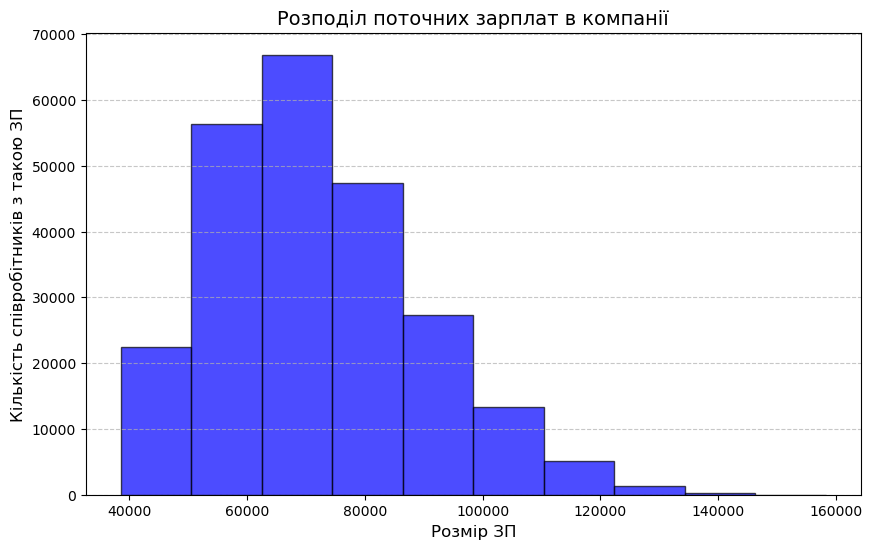

In [100]:
import matplotlib.pyplot as plt

current_employees = res[res['to_date'] == '9999-01-01']

plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=10, edgecolor='black', color='blue', alpha=0.7)

plt.title('Розподіл поточних зарплат в компанії', fontsize=14)
plt.xlabel('Розмір ЗП', fontsize=12)
plt.ylabel('Кількість співробітників з такою ЗП', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [101]:
con.close()